# Mushroom Data Analysis

## Import of functions

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from main import get_mushroom_features_table, MushroomEdibilityModel
from constants import FEATURE_NAMES, EDIBILITY_CLASS
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [2]:
FILE_PATH = 'data/mushroom/agaricus-lepiota.data'

In [3]:
mushroom_df = get_mushroom_features_table(FILE_PATH, FEATURE_NAMES)
mushroom_df.head()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Mushroom data has 22 features. There are 8124 samples. All features are categorical. A preprocessing step to encode features to numerical value will be needed to fit an ML model. There are some missing values in the stalk-root column.

In [8]:
mushroom_df['poisonous'].value_counts()

poisonous
e    4208
p    3916
Name: count, dtype: int64

The problem seems to be balanced. 

# Description of the problem

We would like to understand the differences in characteristics between edible and poisonous mushrooms.

This can be translated in a binary classification task where the target class is edible/poisonous. The goal is to understand the feature importance of the different characteristics.

For this classification task, a Tree based model can allow interpretability of the features and detect non linear relationships between the features.


## Training and Evaluation of Models

Three Tree Based Model will be tested on the precision, recall and F1 score:
- Decision Tree Classifier
- Random Forest Model
- XGBoost 


In [9]:
decision_tree_model = DecisionTreeClassifier(random_state=24)
mushroom_edibility_dt = MushroomEdibilityModel(decision_tree_model, mushroom_df, 'poisonous', 'p')
mushroom_edibility_dt.train()
print(mushroom_edibility_dt.evaluate())

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1076
           1       1.00      1.00      1.00       955

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [11]:
random_forest_model = RandomForestClassifier(random_state=4)
mushroom_edibility_rf = MushroomEdibilityModel(random_forest_model, mushroom_df, 'poisonous', 'p')
mushroom_edibility_rf.train()
print(mushroom_edibility_rf.evaluate())

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1076
           1       1.00      1.00      1.00       955

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [6]:
xgb_model = XGBClassifier(random_state=4)
mushroom_edibility_xgb = MushroomEdibilityModel(xgb_model, mushroom_df, 'poisonous', 'p')
mushroom_edibility_xgb.train()
print(mushroom_edibility_xgb.evaluate())

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1076
           1       1.00      1.00      1.00       955

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



For all 3 models, precision and recall was 100% on poisonous and edible classes.

## Feature Importance

To understand the characteristics of the features, we can plot the feature importance of teh Random Forest Model

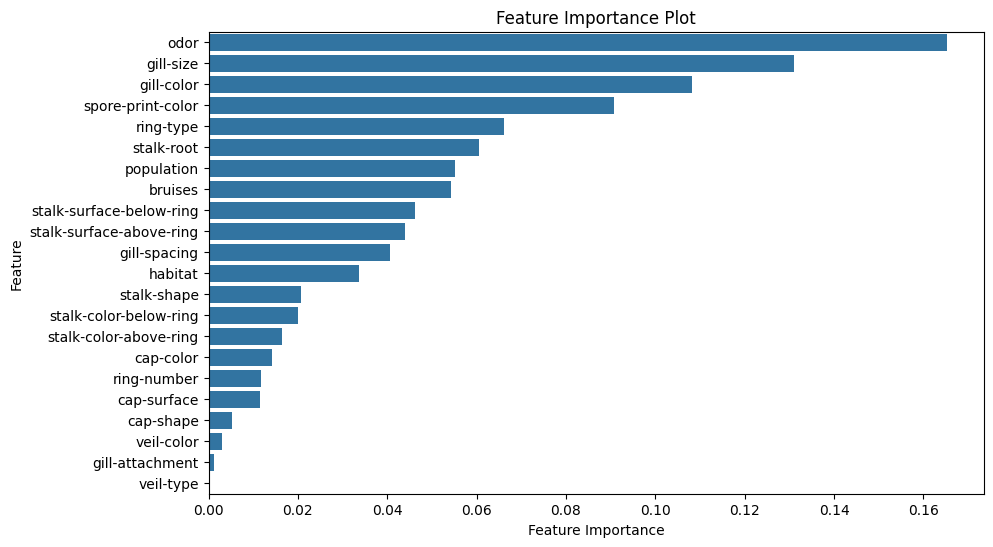

In [12]:
mushroom_edibility_rf.plot_feature_importance_for_model()

Most important features to determine edibility of a mushroom seem to be:
- Odor
- Gill size
- Gill color
- Spore print color

To better understand the interactions within each feature, we can plot the distribution of each field per edibility class.

In [34]:
FEATURES_TO_PLOT = ['odor', 'gill-size', 'gill-color', 'spore-print-color']

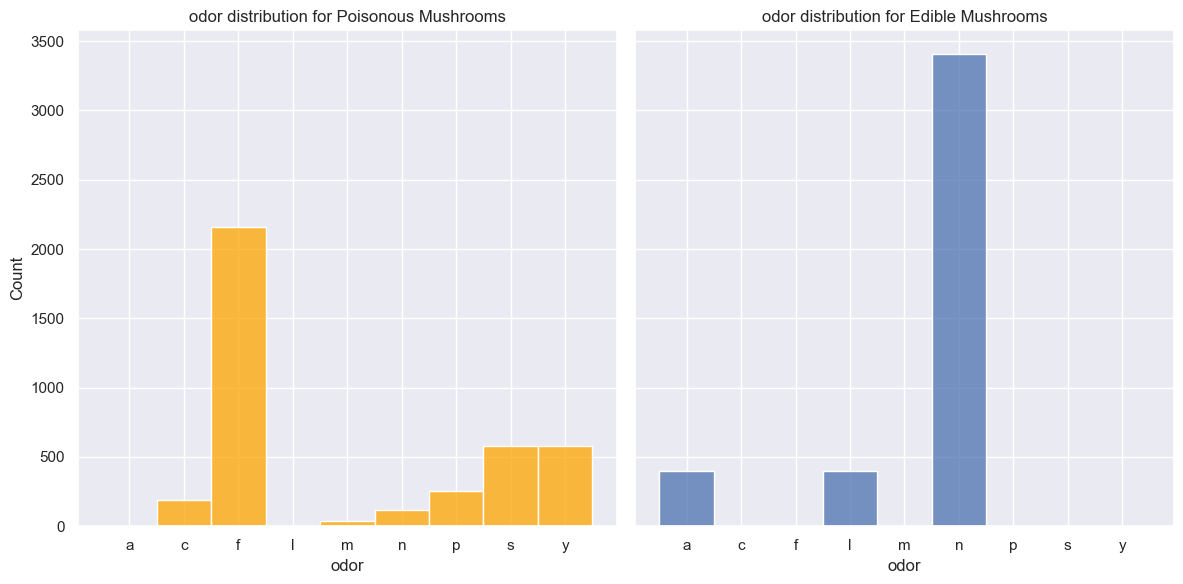

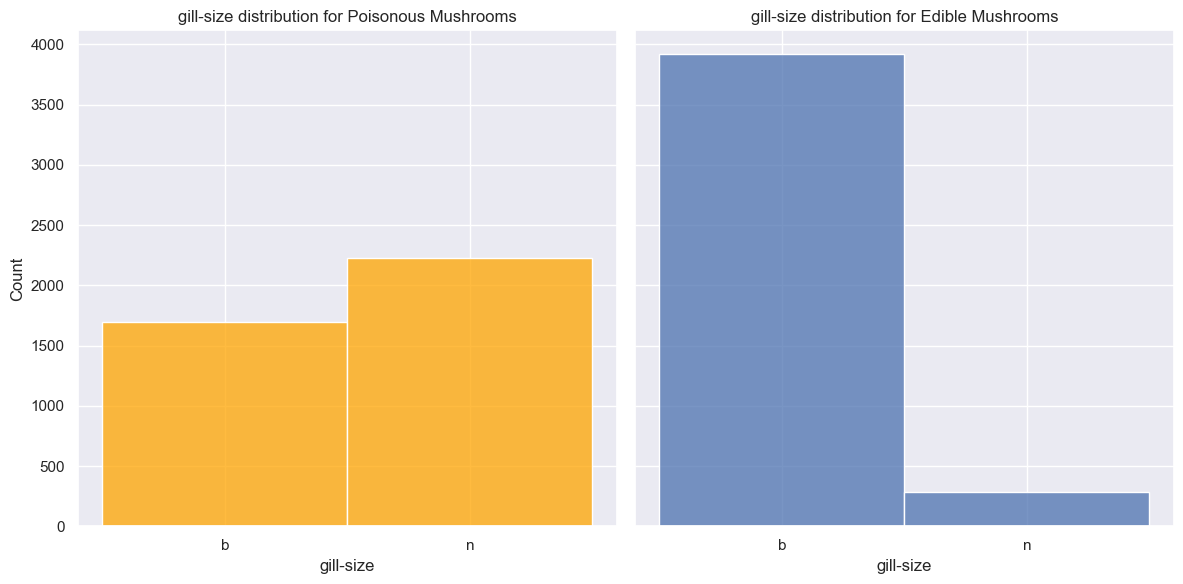

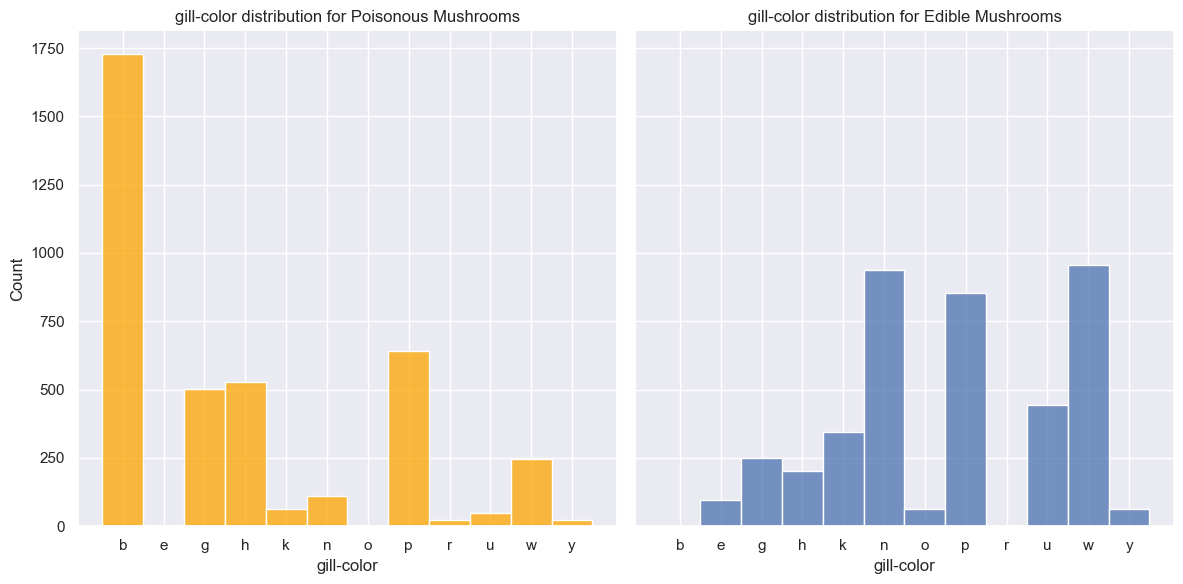

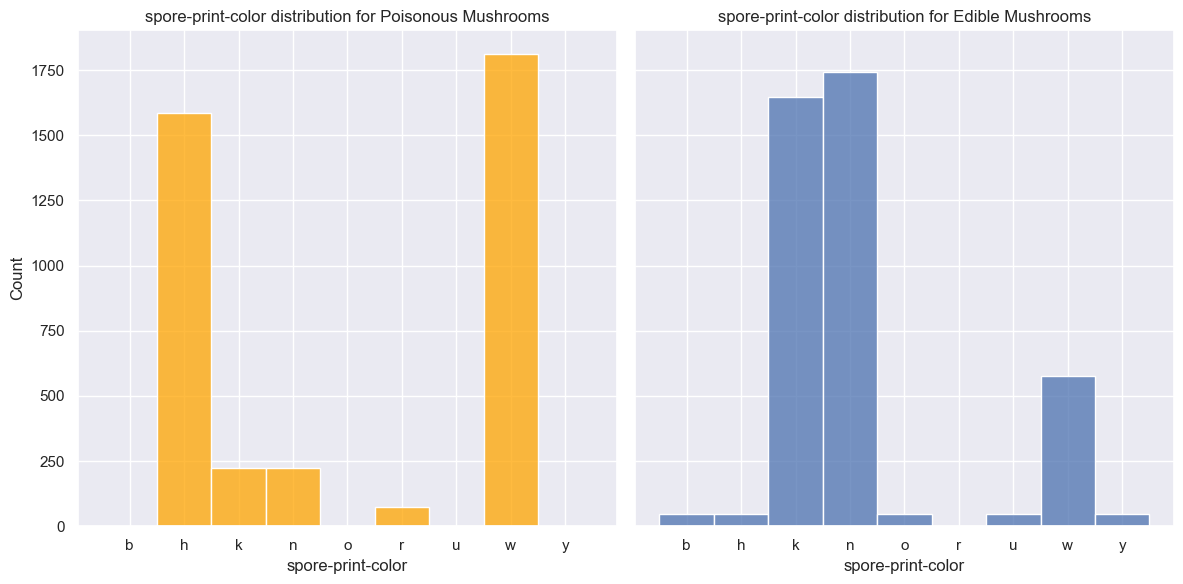

In [36]:
sns.set_theme()

for i, feature in enumerate(FEATURES_TO_PLOT):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=True, sharex=True)

    sns.histplot(mushroom_df[mushroom_df['poisonous'] == 'p'][feature], ax=axes[0], label='poisonous', color='orange')
    axes[0].set_title(feature + ' distribution for Poisonous Mushrooms')
    
    # Plot the second histogram
    sns.histplot(mushroom_df[mushroom_df['poisonous'] == 'e'][feature], ax=axes[1], label='edible')
    axes[1].set_title(feature + ' distribution for Edible Mushrooms')
    
    # Adjust spacing between subplots
    plt.tight_layout()
    
    # Show the plot
    plt.show()

If the odor of the mushroom seems foul, it will most likely be poisonous while edible mushrooms mostly don't have any odor.
If the gill size of the mushroom is narrow it is most likely poisonous.
When the gill color of a mushroom is buff, it is most likely poisonous.
If the spore print color is black or brown, the mushroom is more likely to be edible while a chocolate spore print color might rather mention a poisonous mushroom.
